<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 2

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Análise do dataset 'DENGUE_MBA_ST.csv'**

## 1.1 Quantos casos de dengue há em cada ano para a cidade de Fortaleza?

## 1.2 Como os casos evoluíram no tempo?
- Crie gráficos que apresentem a evolução dos casos de dengue em Fortaleza ao longo do tempo.
- Adicione médias móveis (simples, centralizada e exponencial) nos gráficos para analisar a tendência.

## 1.3 O dado é estacionário?
- Verifique a estacionaridade do dado utilizando testes estatísticos, como o **KPSS**.
- Apresente a conclusão com base no p-valor do teste.

## 1.4 O dado apresenta uma distribuição normal?
- Utilize um teste estatístico, como o **Teste de Shapiro-Wilk**

## 1.5 Treinamento do modelo
- Escolha um período para treinar algum modelo de ML e faça a predição de algumas semanas posteriores.
- Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado?

## 1.6 Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio.


### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning)

from scipy import stats

# Casos de Dengue em Fortaleza

In [ ]:
!gdown 1rcIgSC3rb-QlAYEGNWusPilA6yHDgcH5

Downloading...
From: https://drive.google.com/uc?id=1rcIgSC3rb-QlAYEGNWusPilA6yHDgcH5
To: /content/DENGUE_MBA_ST.csv
100% 144k/144k [00:00<00:00, 64.8MB/s]


In [ ]:
df = pd.read_csv('DENGUE_MBA_ST.csv')

In [ ]:
df.head()

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06


In [ ]:
df['DATA'] = pd.to_datetime(df['DATA'])

In [ ]:
df.columns

Index(['ANO', 'SEMANA_DO_ANO', 'AEROLANDIA', 'AEROPORTO', 'ALDEOTA',
       'ALTO DA BALANCA', 'ALVARO WEYNE', 'AMADEU FURTADO', 'ANCURI',
       'ANTONIO BEZERRA',
       ...
       'VICENTE PINZON', 'VILA ELLERY', 'VILA PERY', 'VILA UNIAO',
       'VILA VELHA', 'ALAGADICO', 'GENTILANDIA', 'MATA GALINHA',
       'PAN-AMERICANO', 'DATA'],
      dtype='object', length=122)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Columns: 122 entries, ANO to DATA
dtypes: datetime64[ns](1), float64(4), int64(117)
memory usage: 498.6 KB


In [ ]:
# Escolhenado apenas os bairros
df.drop(['ANO','SEMANA_DO_ANO','DATA'], axis=1)

,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,ARRAIAL MOURA BRASIL,AUTRAN NUNES,...,VARJOTA,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO
0,0,0,1,0,0,0,3,0,0,0,...,0,1,0,1,0,2,0.0,0.0,0.0,0.0
1,0,0,0,0,1,0,1,0,1,0,...,0,1,1,5,1,4,0.0,0.0,0.0,0.0
2,0,0,2,1,1,0,7,1,4,0,...,1,6,0,6,4,2,0.0,0.0,0.0,0.0
3,0,0,0,0,2,0,2,0,1,1,...,0,6,2,8,1,0,0.0,0.0,0.0,0.0
4,0,0,0,1,4,0,2,0,2,0,...,1,6,2,2,5,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,1,0,2,0,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
519,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,2,0.0,0.0,0.0,0.0
520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0.0,0.0,0.0,0.0
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0.0,0.0,0.0


In [ ]:
# capturando todos os nomes dos bairros
bairros = df.drop(['ANO','SEMANA_DO_ANO','DATA'], axis=1).columns
bairros

Index(['AEROLANDIA', 'AEROPORTO', 'ALDEOTA', 'ALTO DA BALANCA', 'ALVARO WEYNE',
       'AMADEU FURTADO', 'ANCURI', 'ANTONIO BEZERRA', 'ARRAIAL MOURA BRASIL',
       'AUTRAN NUNES',
       ...
       'VARJOTA', 'VICENTE PINZON', 'VILA ELLERY', 'VILA PERY', 'VILA UNIAO',
       'VILA VELHA', 'ALAGADICO', 'GENTILANDIA', 'MATA GALINHA',
       'PAN-AMERICANO'],
      dtype='object', length=119)

In [ ]:
# Dado de Fortaleza
Fortaleza = pd.Series(df[bairros].sum(axis=1).values, index=df['DATA'].values)

In [ ]:
Fortaleza

,0
2011-01-09,200.0
2011-01-16,296.0
2011-01-23,288.0
2011-01-30,297.0
2011-02-06,341.0
...,...
2020-12-06,29.0
2020-12-13,26.0
2020-12-20,36.0
2020-12-27,21.0


In [ ]:
def teste_estacionaridade(x):
    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

def teste_normalidade(x):
    e, p = stats.shapiro(x)
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')

In [ ]:
casos_por_ano = Fortaleza.groupby(Fortaleza.index.year).sum()
casos_por_ano

,0
2011,33212.0
2012,37172.0
2013,8360.0
2014,4935.0
2015,26128.0
2016,21001.0
2017,13469.0
2018,1408.0
2019,3778.0
2020,7689.0


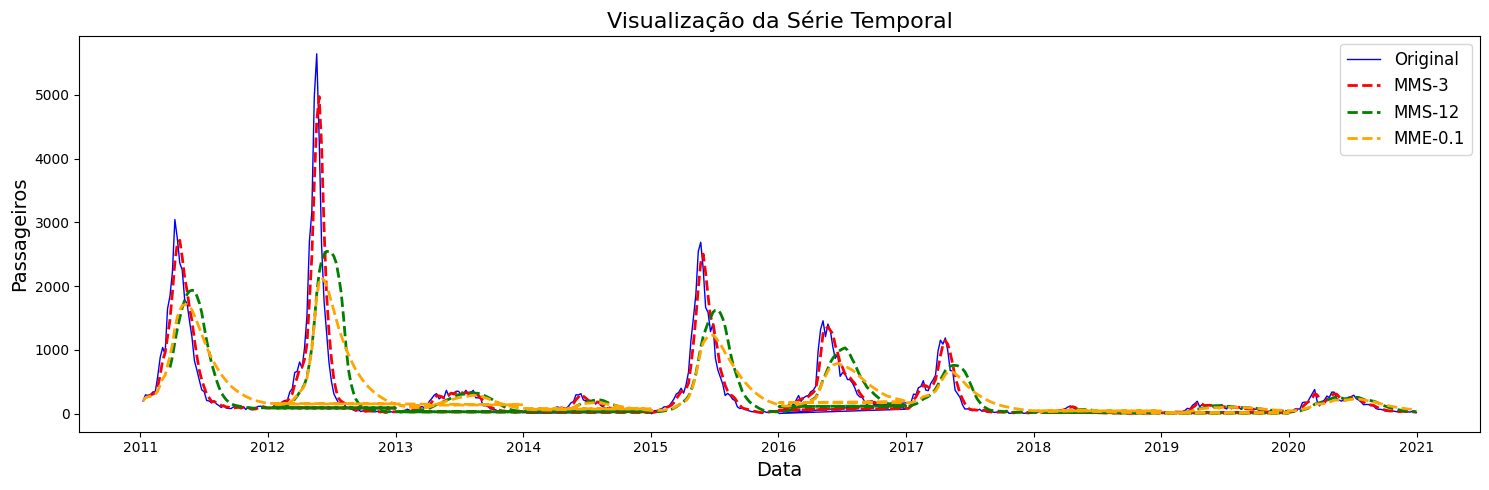

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(Fortaleza, color='blue', linewidth=1, label='Original')
plt.plot(Fortaleza.rolling(3).mean(), c='red', lw=2, ls='--', label='MMS')
plt.plot(Fortaleza.rolling(3,ce).mean(), c='green', lw=2, ls='--', label='MMC')
plt.plot(Fortaleza.ewm(alpha=0.1).mean(), c='orange', lw=2, ls='--', label='MME')

plt.title('Visualização da Série Temporal', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Passageiros', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
teste_estacionaridade(Fortaleza)
teste_normalidade(Fortaleza)

A série NÃO é estacionária
A distribuição NÃO é normal


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
fortaleza_mensal = Fortaleza.resample('ME').sum()
fortaleza_mensal = fortaleza_mensal.reset_index()
fortaleza_mensal.columns = ['data', 'casos']
fortaleza_mensal['MMS10'] = fortaleza_mensal['casos'].rolling(10).mean()
fortaleza_mensal['EXP05'] = fortaleza_mensal['casos'].ewm(alpha=0.5).mean()
fortaleza_mensal['meses'] = np.arange(len(fortaleza_mensal))
fortaleza_mensal['meses']

,meses
0,0
1,1
2,2
3,3
4,4
...,...
115,115
116,116
117,117
118,118


In [ ]:
X = fortaleza_mensal['meses']
Y = fortaleza_mensal['casos']
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42)

model = XGBRegressor()
model.fit(X, Y)

print(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

1.8848092830455943


In [ ]:
X = fortaleza_mensal['EXP05']
Y = fortaleza_mensal['casos']
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42)

model = XGBRegressor()
model.fit(X, Y)

print(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

13.18498263287433


In [ ]:
X = fortaleza_mensal['meses'][0:50]
Y = fortaleza_mensal['casos'][0:50]

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42)

model = XGBRegressor()
model.fit(X, Y)

fortaleza_mensal['predicao'] = model.predict(fortaleza_mensal[['meses']].values)

print(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

0.09767228384315818


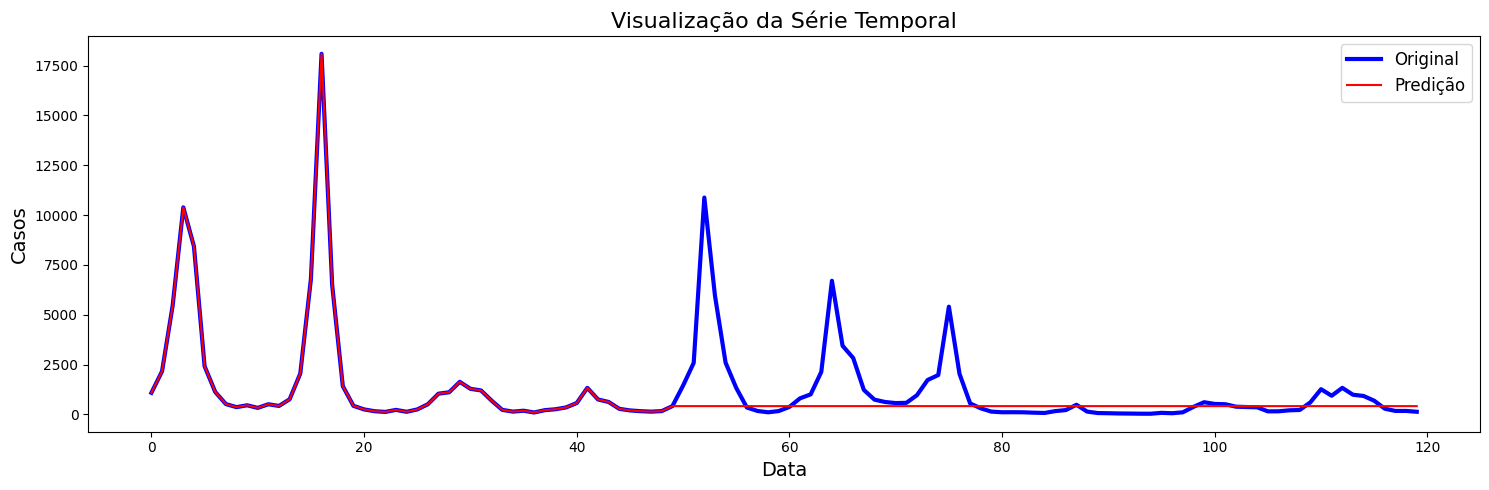

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(fortaleza_mensal['casos'], color='blue', lw=3, label='Original')
plt.plot(fortaleza_mensal['predicao'], c='r', label='Predição')

plt.title('Visualização da Série Temporal', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Casos', fontsize=14)


plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [ ]:
df_2011 = df.copy()[df['DATA'].dt.year == 2011]
df_2011_bairros = df_2011.drop(['ANO','SEMANA_DO_ANO','DATA'], axis=1)

Index(['AEROLANDIA', 'AEROPORTO', 'ALDEOTA', 'ALTO DA BALANCA', 'ALVARO WEYNE',
       'AMADEU FURTADO', 'ANCURI', 'ANTONIO BEZERRA', 'ARRAIAL MOURA BRASIL',
       'AUTRAN NUNES',
       ...
       'VARJOTA', 'VICENTE PINZON', 'VILA ELLERY', 'VILA PERY', 'VILA UNIAO',
       'VILA VELHA', 'ALAGADICO', 'GENTILANDIA', 'MATA GALINHA',
       'PAN-AMERICANO'],
      dtype='object', length=119)

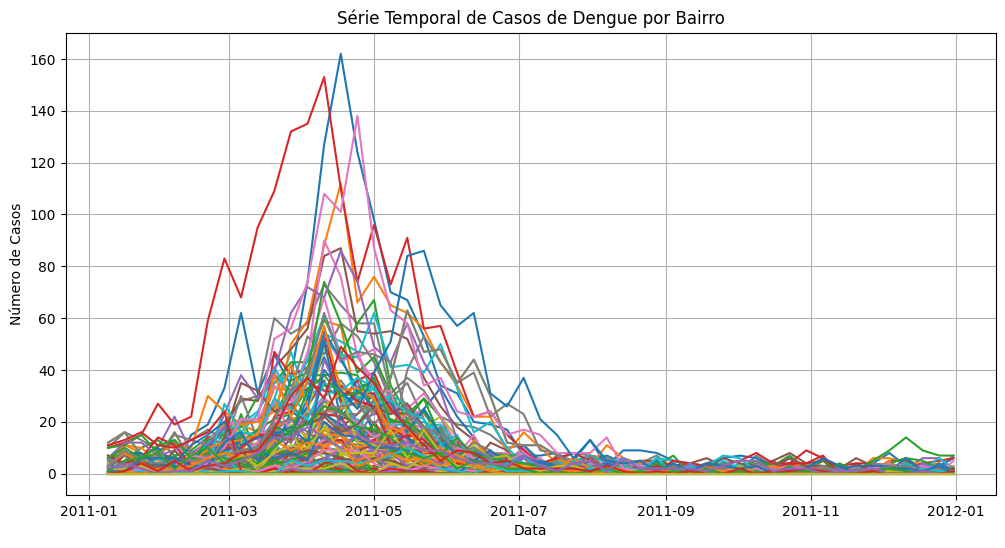

In [ ]:
plt.figure(figsize=(12, 6))

for bairro in df_2011_bairros.columns:
    plt.plot(df_2011['DATA'], df_2011[bairro], label=bairro)

plt.title("Série Temporal de Casos de Dengue por Bairro")
plt.xlabel("Data")
plt.ylabel("Número de Casos")

plt.grid(True)
plt.show()

In [ ]:
df_2011_bairros.corr()

,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,ARRAIAL MOURA BRASIL,AUTRAN NUNES,...,VARJOTA,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO
AEROLANDIA,1.000000,0.695000,0.877590,0.883090,0.870821,0.731619,0.334305,0.866024,-0.043619,0.731350,...,0.739128,0.553430,0.652742,0.875999,0.931559,0.759534,NaN,NaN,NaN,NaN
AEROPORTO,0.695000,1.000000,0.689793,0.740115,0.790882,0.564468,0.323201,0.754698,-0.044609,0.668079,...,0.278924,0.185218,0.756136,0.737362,0.675135,0.615944,NaN,NaN,NaN,NaN
ALDEOTA,0.877590,0.689793,1.000000,0.869047,0.838314,0.796904,0.497221,0.953377,-0.038962,0.869783,...,0.649733,0.448727,0.790969,0.890145,0.931188,0.842680,NaN,NaN,NaN,NaN
ALTO DA BALANCA,0.883090,0.740115,0.869047,1.000000,0.844913,0.727992,0.361858,0.858964,0.044814,0.792560,...,0.621836,0.495586,0.738803,0.854474,0.867566,0.740811,NaN,NaN,NaN,NaN
ALVARO WEYNE,0.870821,0.790882,0.838314,0.844913,1.000000,0.578965,0.331985,0.872461,-0.101881,0.762966,...,0.620235,0.479607,0.700817,0.838066,0.809645,0.781401,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VILA VELHA,0.759534,0.615944,0.842680,0.740811,0.781401,0.689669,0.419646,0.905301,-0.014445,0.864554,...,0.662291,0.546096,0.783110,0.808809,0.845378,1.000000,NaN,NaN,NaN,NaN
ALAGADICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENTILANDIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MATA GALINHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
